### Download dataset from here
link: https://www.kaggle.com/datasets/yasserh/titanic-dataset/data

## Step 1: Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 2: Reading Dataset

In [2]:
df=pd.read_csv("titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### About Dataset:
- PassengerId: Unique id to each passenger
- Survived: Outcome of survival (0 = No; 1 = Yes)
- Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- Name: Name of passenger
- Sex: Sex of the passenger
- Age: Age of the passenger (Some entries contain NaN)
- SibSp: Number of siblings and spouses of the passenger aboard
- Parch: Number of parents and children of the passenger aboard
- Ticket: Ticket number of the passenger
- Fare: Fare paid by the passenger
- Cabin: Cabin number of the passenger (Some entries contain NaN)
- Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

#### Observations:
- passengerid, name, ticket has no significance on target variable
- There are 3 classes in titanic 
- age has 177 and embarked has 2 and cabin has 687 missing values

## Step 3: Data Reduction

In [10]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [11]:
#since cabin has so many missing values, so we will drop it
#df.drop(["Cabin"],axis=1,inplace=True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [13]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [14]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


## Step 4: Numerical and categorical columns

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [16]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols=df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables are ",cat_cols)
print("Numerical Variables are ",num_cols)

Categorical Variables are  Index(['Sex', 'Cabin', 'Embarked'], dtype='object')
Numerical Variables are  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


## Step 5: EDA Exploratory Data Analysis¶
Key Features of EDA:
1. Understanding the Data: EDA helps in understanding the structure, distribution, and characteristics of the dataset. It provides insight into the nature of the data, such as its range, variability, and central tendencies.
2. Identifying Patterns and Relationships: EDA techniques allow for the identification of patterns, trends, and relationships within the data. This includes discovering correlations between variables, detecting outliers, and uncovering hidden patterns that may not be immediately apparent.
3. Generating Hypotheses: EDA often leads to the generation of hypotheses or research questions. By exploring the data visually and quantitatively, analysts can formulate hypotheses about the underlying factors driving observed patterns in the data.
4. Feature Selection: EDA helps in identifying important features or variables that are relevant for modeling or analysis. By examining the relationships between variables and their associations with the target variable, analysts can determine which features are most informative for predictive modeling or further analysis.
5. Data Cleaning and Preprocessing: EDA helps in detecting and addressing data quality issues such as missing values, outliers, and inconsistencies. By identifying problematic data points early in the analysis process, analysts can take appropriate steps to clean and preprocess the data, ensuring the accuracy and reliability of subsequent analyses.
6. Communicating Results: EDA provides visualizations and summaries that facilitate communication of results to stakeholders. Visualizations such as charts, graphs, and summary statistics make it easier to convey complex findings and insights in a clear and understandable manner.
7. Informing Decision-Making: EDA helps in making informed decisions by providing insights into the data that can guide subsequent analysis, modeling, and decision-making processes. By understanding the underlying structure of the data, analysts can make more accurate predictions and formulate effective strategies

In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### 5.1) Univariate Analysis
- Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

- Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Survived


C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


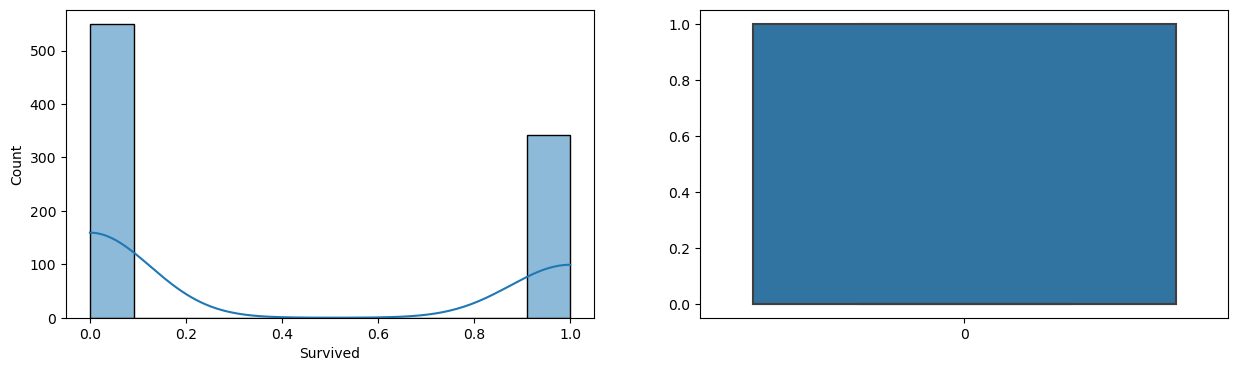

Pclass


C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


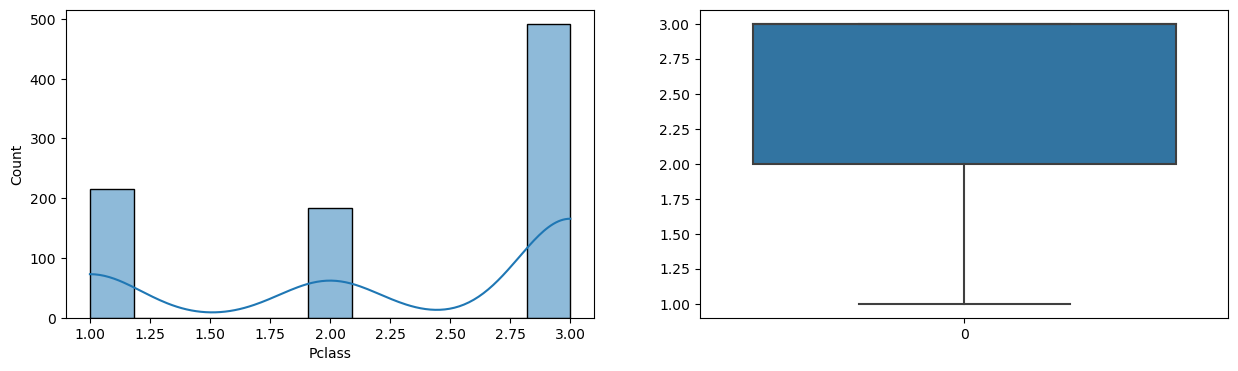

Age


C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


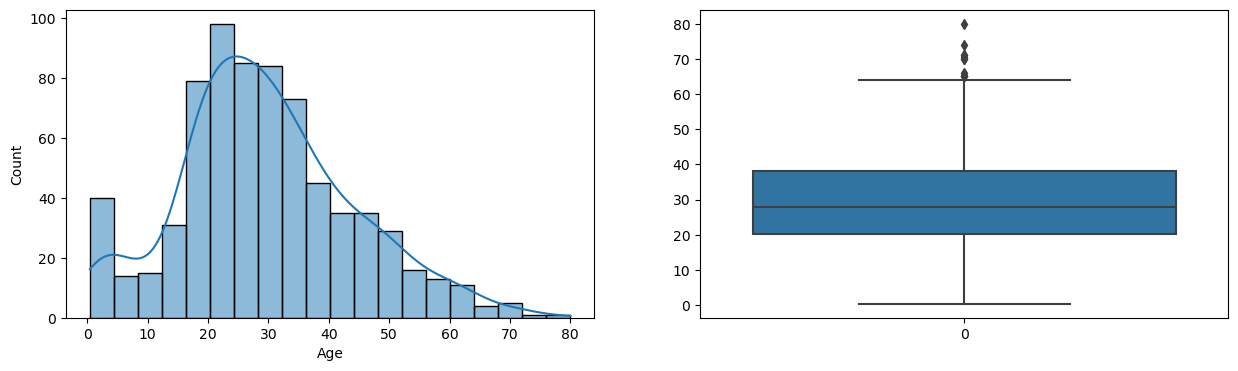

SibSp


C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


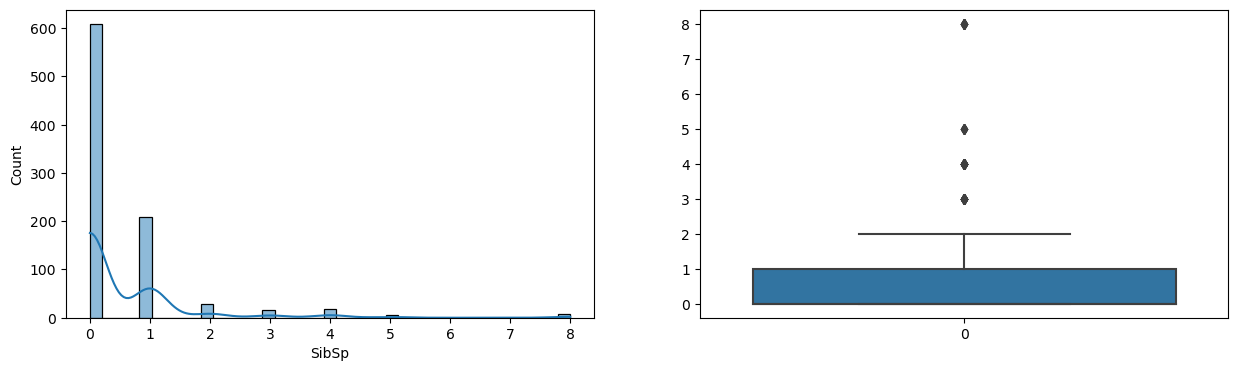

Parch


C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


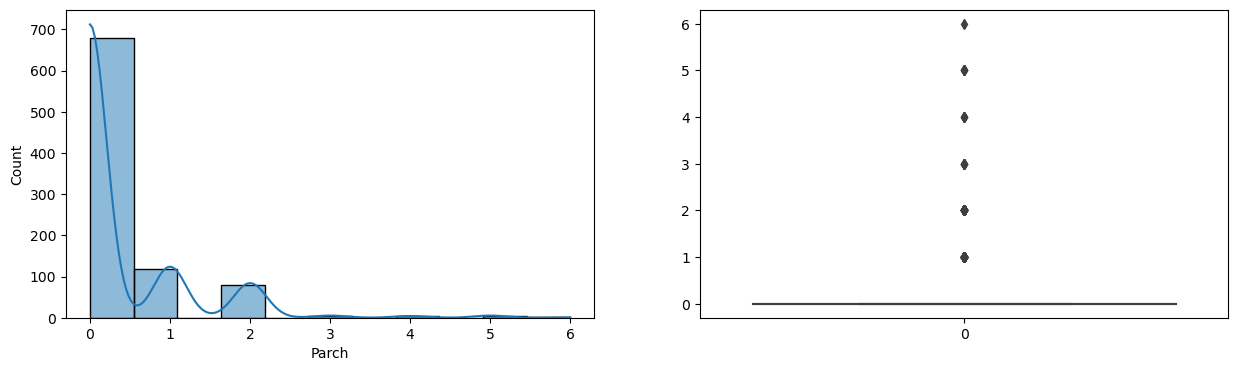

Fare


C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


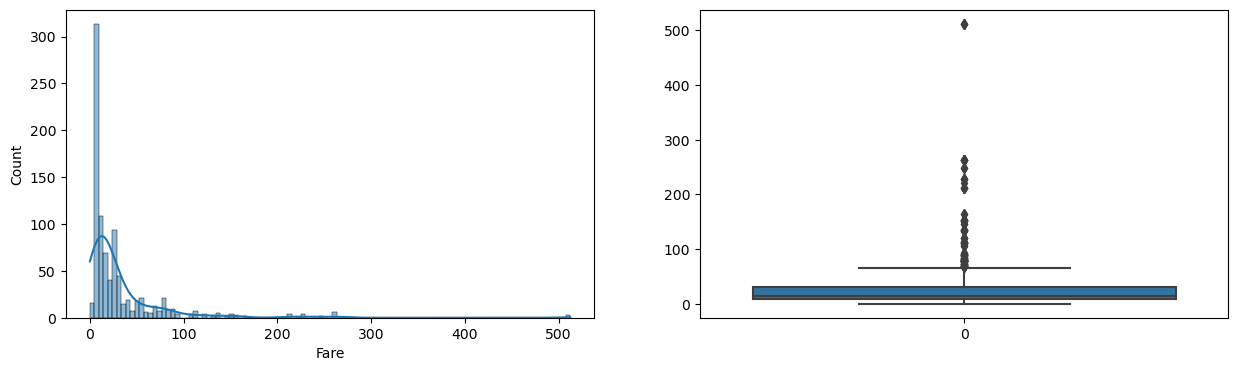

In [18]:
# brahamstra for univariate analysis for numerical columns
for col in num_cols:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.ylabel("Count")
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()

#### Observations:
- Most people failed to survive in titanic
- Most people are travelling from 3rd class
- Most people age range vary from 20-40 and very few people are above 65
- Most people are travelling with no sibiling and spouse
- most people have no parent n children
- some outliers are present in fare

Sex


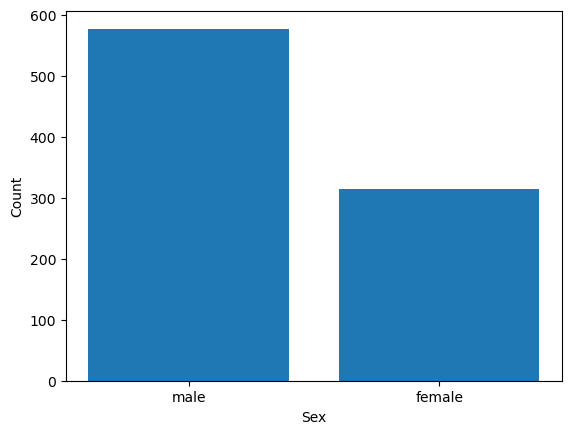

Cabin


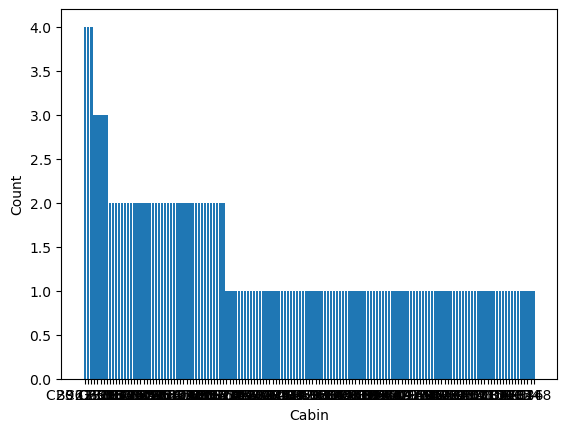

Embarked


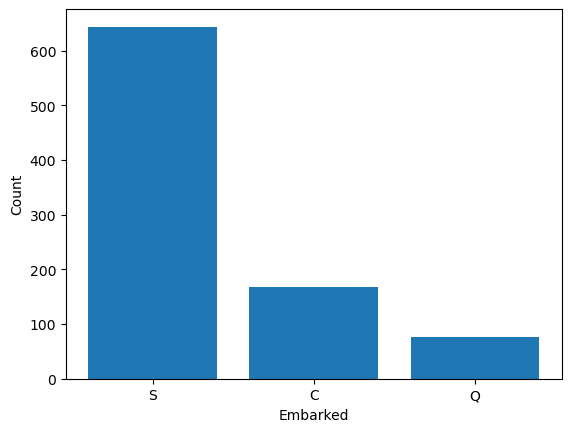

In [19]:
# For categorical columns
for col in cat_cols:
    print(col)
    plt.bar(df[col].value_counts().index, df[col].value_counts().values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

#### Observations:
- People travelling in titanic are mostly male
- Most people embarked from southampton

### 5.2) BiVariate Analysis
- Countplot of each column against target variable 

C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

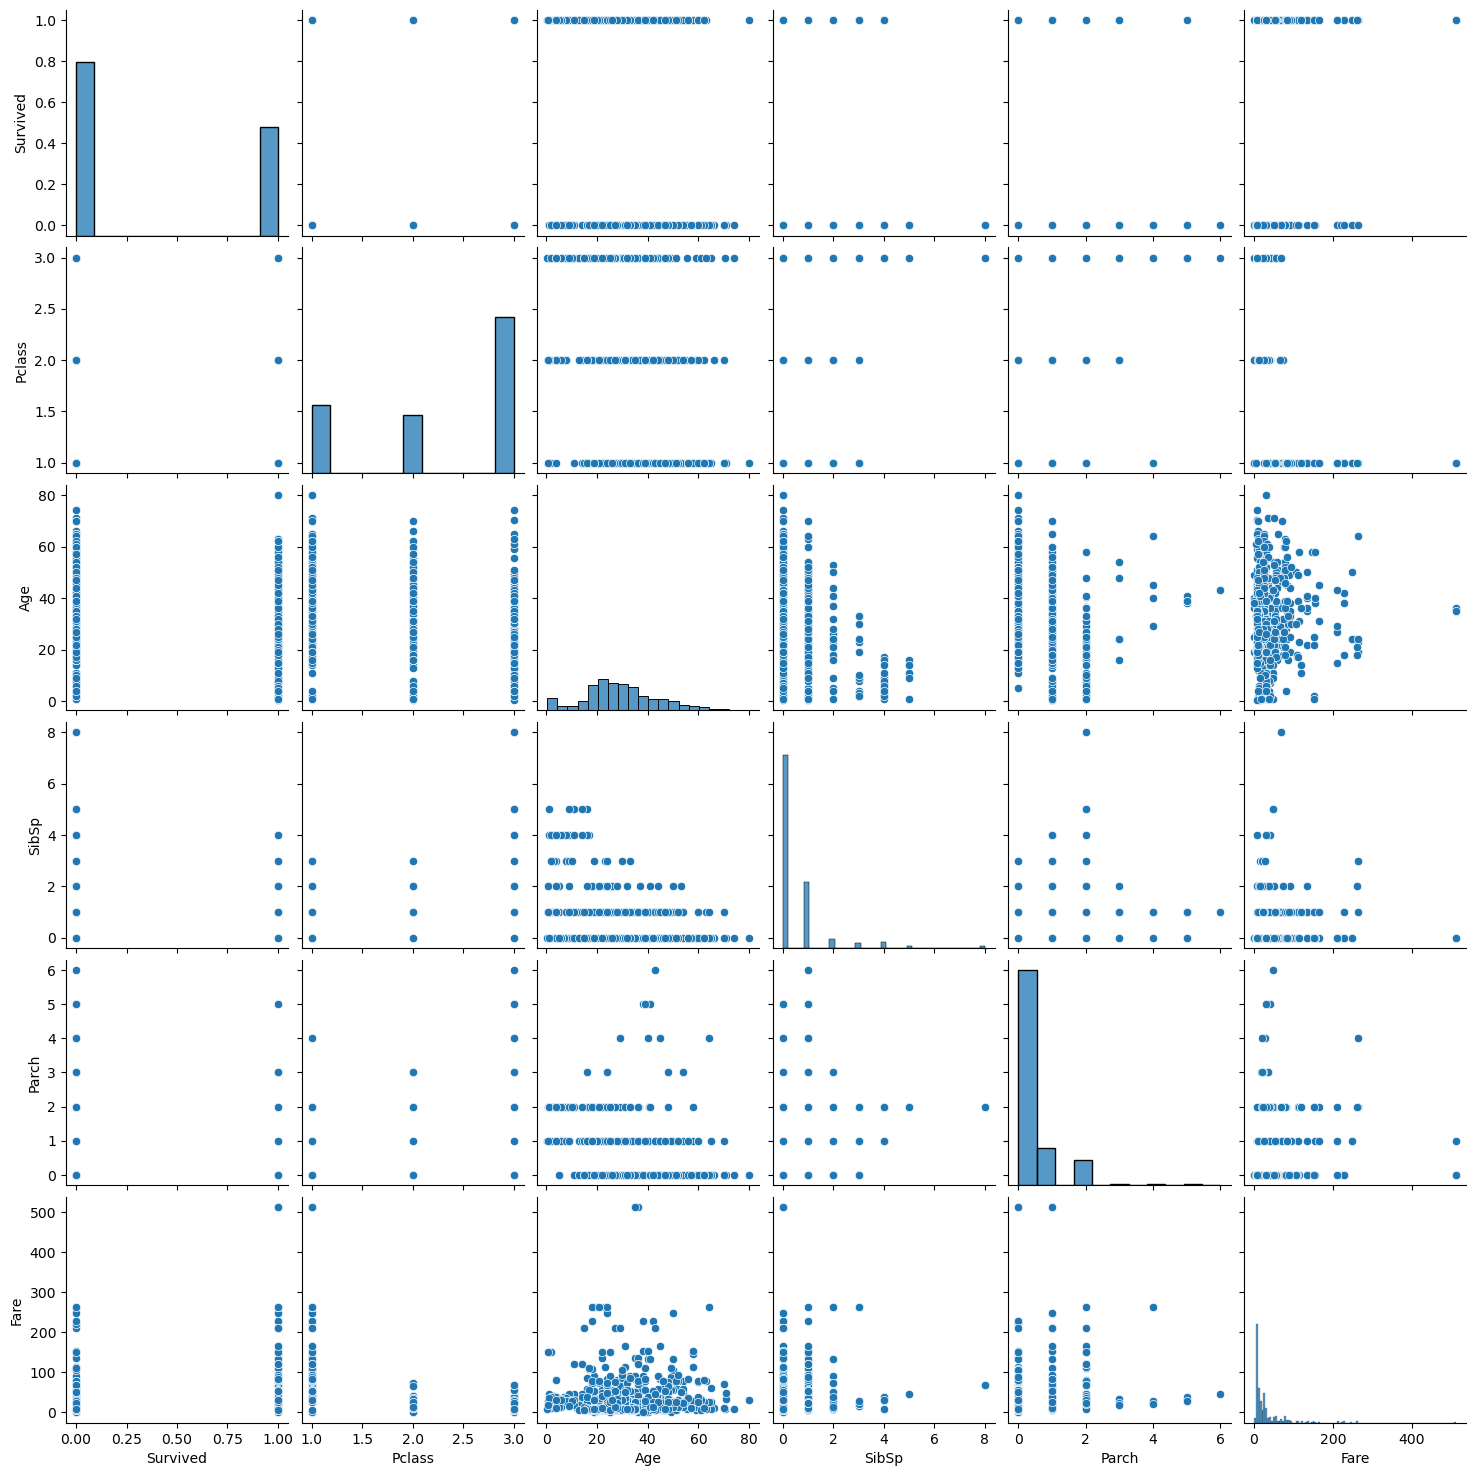

In [20]:
sns.pairplot(df)
plt.show()

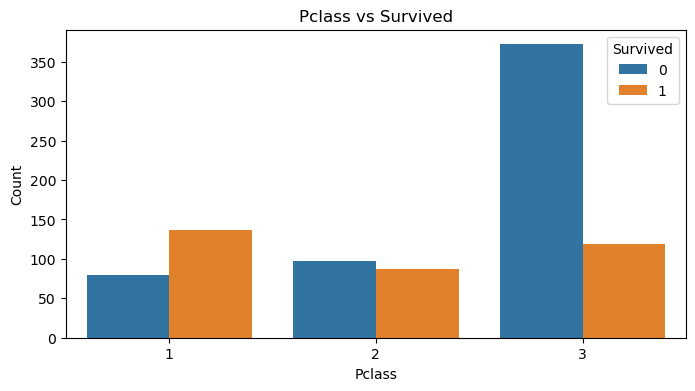

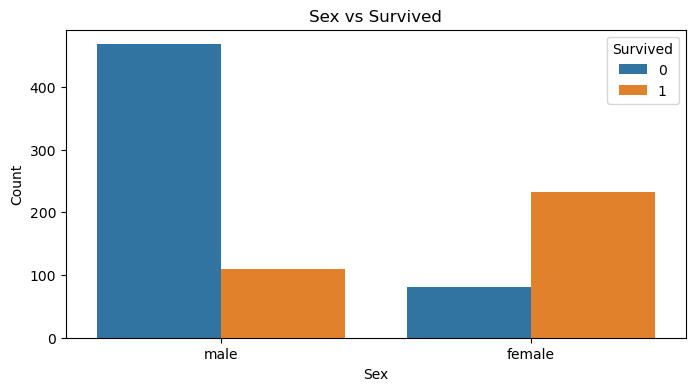

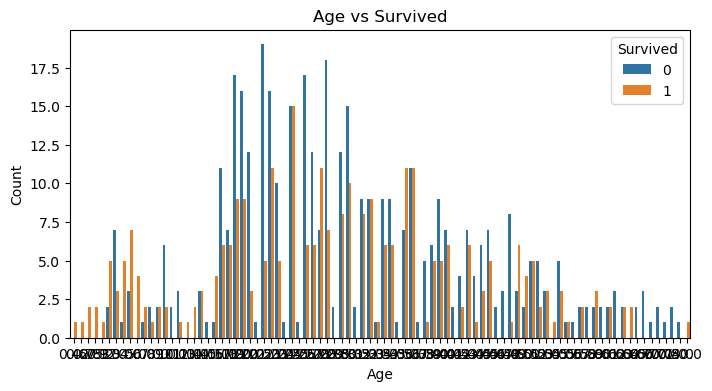

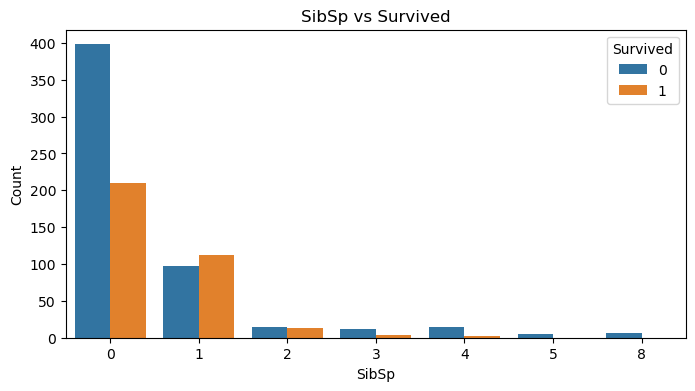

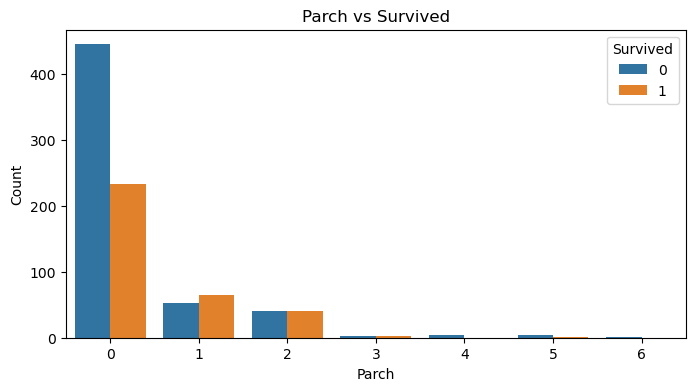

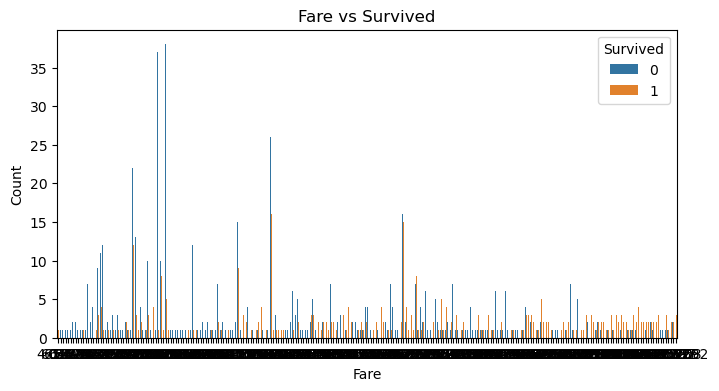

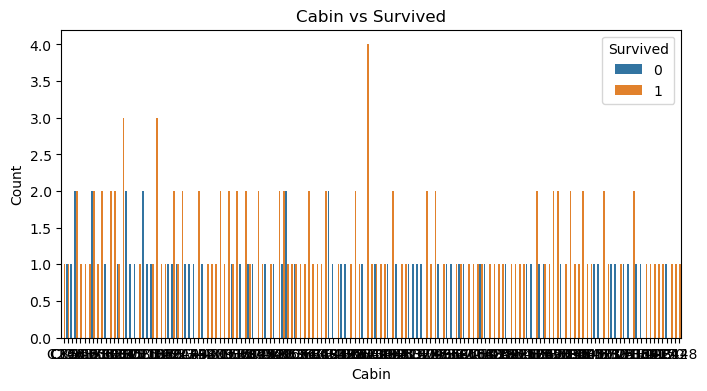

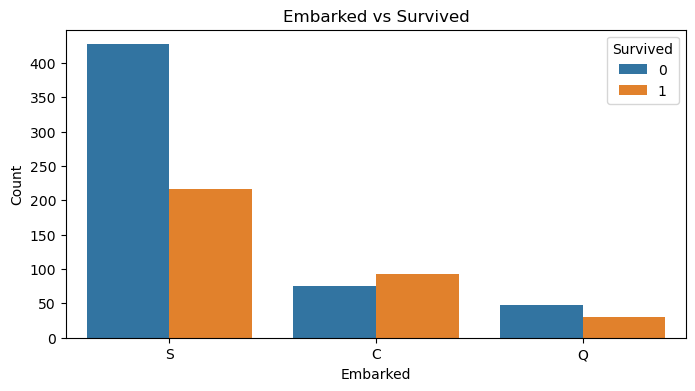

In [21]:
for col in df.columns:
    if col != "Survived":
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue="Survived", data=df)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"{col} vs Survived")
        plt.show()

#### Observations:
- Most 1st class people survived while 3rd class people died
- Most male died while most females survived
- Those having 1 sibiling or spouse has more chance of surviving 
- Those having 1 parent or child has more chance of surviving
- Those who embarked from Cherbourg has great chance of survining

### 5.3) Multivariate Analysis

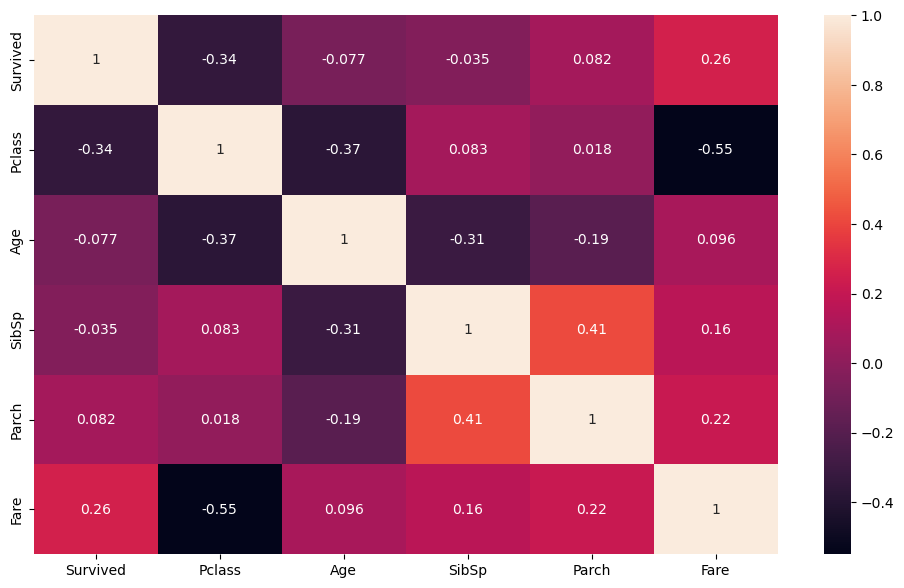

In [22]:
df1=df.select_dtypes(exclude=['object'])
plt.figure(figsize=(12, 7))
sns.heatmap(df1.corr(),annot=True)
plt.show()

#### Observations:
- Survival depends mostly on Pclass and Fare only
- 1st class has large Fare 

## Step 6- Feature Engineering
Feature engineering is a machine learning technique that involves extracting and transforming raw data into features that can be used for training and prediction. The goal of feature engineering is to: Improve model accuracy, Simplify and speed up data transformations, and Design and train new machine learning features

In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [24]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 6.1) Handling Missing Values
### Types of Missing Values:
There are mainly three types of missing values- MCAR, MNAR and MAR.

1. ##### MCAR (Missing Completly At Random):
A variable is missing completely at random if the probability of being missing is the same for all the observations.
When data is MCAR, which Means there is absolutely no relationship between the data missing and any other observed or missing value in the dataset.
In other words, those missing data points are a random subset of the dataset.

2. ##### MNAR (Missing Data Not At Random):
As the name suggests their will be some relationship between the data missing and any other value in the dataset.

3. ##### MAR(Missing At Random):
Missing at Random means, the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data

#### Why Handle Missing Values ?
- Many machine learning algorithms faild to perform on the dataset if it contains missing values. However there are some algorithms that works even with missing values like K-nearest neighbours and Naive Bayes.
- You may end up building a biased model that will lead to incorrect results.
- Missing values reduces accuracy of the model.
- Missing values can lead to less precision.

In [25]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [26]:
#Missing Values Percentage
round((df.isna().sum() / len(df))*100,2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

### How To Handle Missing Values?
There are two ways to handle missing values-
- Dropping Missing Values
- Imputing Missing Values With Some Other Value (Preferred)

1. #### Dropping Missing Values
- if missing values is of type Missing At Random(MAR) or Missing Completly At Random(MCAR) then it can be deleted.
- One of the biggest disadvantage of dropping missing values is one might end up deleting some useful data as well with missing values.

There are two ways to remove missing values
- Deleting the entire row containing missing values
- Deleting the entire column containing missing values

#### 1. Deleting the entire row

In [27]:
df1 = df.copy()
df1 = df1.dropna(axis=0)
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [28]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,D35,S
872,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,1,1,female,56.0,0,1,83.1583,C50,C
887,1,1,female,19.0,0,0,30.0000,B42,S


In [29]:
print('Dataset Size With Missing Values',df.shape)
print('Dataset Size Without Missing Values',df1.shape)

Dataset Size With Missing Values (891, 9)
Dataset Size Without Missing Values (183, 9)


There is a big loss of data, because Cabin column contains more than 75% missing values.
#### 2. Deleting The Entire Column

In [30]:
## Copy of data
df2 = df.copy()
df2 = df2.drop(['Cabin','Age','Embarked'],axis=1) 
df2.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [31]:
df2

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000
887,1,1,female,0,0,30.0000
888,0,3,female,1,2,23.4500
889,1,1,male,0,0,30.0000


#### Conclusion:
- Although We Have Removed Missing Values, But With Them a big part of data is also lost. Like Age is a very important column for survival of a person.

- Deleting Missing Values From The Dataset Is Only An Option if we have less than 10% of missing values on a big dataset.

- The Best and Evergreen option is to Impute missing values with some other similar value.

### 2. Imputing Missing Values
#### METHOD 1 → Mean Value Imputation
In this technique we replace missing values with the mean value of the column containing missing values

C:\Users\Sarthak Aggarwal\AppData\Local\Temp\ipykernel_15608\182017004.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)
C:\Users\Sarthak Aggarwal\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='Age', ylabel='Density'>

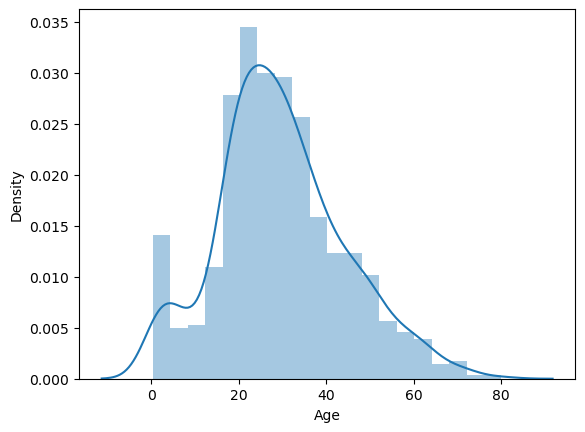

In [32]:
## First Step : Check The Distribution
sns.distplot(df.Age)

In [33]:
def impute_nan_mean(df,column,mean):
    df[column+'_mean'] = df[column].fillna(mean)
    return df

mean_val = df.Age.mean()
df_mean = impute_nan_mean(df,'Age',mean_val)

In [34]:
df_mean[df_mean.Age.isna()][['Age','Age_mean']]

,Age,Age_mean
5,NaN,29.699118
17,NaN,29.699118
19,NaN,29.699118
26,NaN,29.699118
28,NaN,29.699118
...,...,...
859,NaN,29.699118
863,NaN,29.699118
868,NaN,29.699118
878,NaN,29.699118


In [35]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_mean
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.000000
1,1,1,female,38.0,1,0,71.2833,C85,C,38.000000
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.000000
3,1,1,female,35.0,1,0,53.1000,C123,S,35.000000
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.000000
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,27.000000
887,1,1,female,19.0,0,0,30.0000,B42,S,19.000000
888,0,3,female,NaN,1,2,23.4500,NaN,S,29.699118
889,1,1,male,26.0,0,0,30.0000,C148,C,26.000000


Mean Imputation is a great choice, if distribution is normal or close to normal.

In case of skewed distribution we shoud go with meadian value.

#### METHOD 2: Median Value Imputation
In this technique we replace all the missing value with median value of the column

In [36]:
## Imputing missing value with median value of the column
def impute_nan_median(df,column,median):
    df[column+'_median'] = df[column].fillna(median)
    return df

median_val = df.Age.median()
df_med = impute_nan_median(df,'Age',median_val)

In [37]:
df_med[df_med.Age.isna()][['Age','Age_median']]

,Age,Age_median
5,NaN,28.0
17,NaN,28.0
19,NaN,28.0
26,NaN,28.0
28,NaN,28.0
...,...,...
859,NaN,28.0
863,NaN,28.0
868,NaN,28.0
878,NaN,28.0


### METHOD 3: Mode Imputation (Frequent Category Imputation)
Mode value imputation is mostly used for categorical data. it can also be used for numerical variables as well.

- In this technique we replace all the missing values with the most frequent value of the column.

In [38]:
def impute_nan_mode(df,column,mode):
    df[column+'_mode'] = df[column].fillna(mode)
    return df

mode_val = df.Age.mode()
df_mode = impute_nan_mode(df,'Age',mode_val)

In [39]:
df_mode[df_mode.Age.isna()][['Age','Age_mode']]

,Age,Age_mode
5,NaN,NaN
17,NaN,NaN
19,NaN,NaN
26,NaN,NaN
28,NaN,NaN
...,...,...
859,NaN,NaN
863,NaN,NaN
868,NaN,NaN
878,NaN,NaN


you see how most NAN values gets replaced with NAN values because the most frequent value of this numerical column is NAN. To use mode here we need to ignore all the NAN values and then apply mode on remaining values.

In [40]:
df[df.Age.notna()]['Age'].mode()[0]

24.0

In [41]:
def impute_nan_mode(df,column,mode):
    df[column+'_mode'] = df[column].fillna(mode)
    return df

mode_val = df[df.Age.notna()]['Age'].mode()[0]    ## find mode of all the non missing values of Age column
df_mode = impute_nan_mode(df,'Age',mode_val)

In [42]:
df_mode[df_mode.Age.isna()][['Age','Age_mode']]

,Age,Age_mode
5,NaN,24.0
17,NaN,24.0
19,NaN,24.0
26,NaN,24.0
28,NaN,24.0
...,...,...
859,NaN,24.0
863,NaN,24.0
868,NaN,24.0
878,NaN,24.0


Although the above code worked but you should never use mode for a numerical column until there is some exception.

Mode works better for categorical data with less categories.

- One of the biggest advantage of using mode as categorical data imputer is that we don't need to convert categories into numerical data.

Let's use it to fill missing values in Embarked Column.

In [43]:
df.Embarked.isna().sum()

2

In [44]:
print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [45]:
#### STEP 1: Find Mode Values
mode_cat_embarked = df.Embarked.mode()[0]

#### STEP 2: Fill Missing Values With Most Frequent Category
df['Embarked_mode'] = df['Embarked'].fillna(mode_cat_embarked)

#### Check For Results
df['Embarked_mode'].isna().sum()

0

In [46]:
mode_cat_embarked

'S'

In [47]:
df.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Cabin            687
Embarked           2
Age_mean           0
Age_median         0
Age_mode           0
Embarked_mode      0
dtype: int64

In [48]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_mean,Age_median,Age_mode,Embarked_mode
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.000000,22.0,22.0,S
1,1,1,female,38.0,1,0,71.2833,C85,C,38.000000,38.0,38.0,C
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.000000,26.0,26.0,S
3,1,1,female,35.0,1,0,53.1000,C123,S,35.000000,35.0,35.0,S
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.000000,35.0,35.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,27.000000,27.0,27.0,S
887,1,1,female,19.0,0,0,30.0000,B42,S,19.000000,19.0,19.0,S
888,0,3,female,NaN,1,2,23.4500,NaN,S,29.699118,28.0,24.0,S
889,1,1,male,26.0,0,0,30.0000,C148,C,26.000000,26.0,26.0,C


#### METHOD 4: Random Sample Imputation
In this method we will replace all the missing values with a random sample from the data.

In [49]:
### STEP 1: Generating Random Sample
sample = df.Age.sample().values[0]

### STEP 2: Filling nan values with random sample value
df['Age'+'_random_sample'] = df['Age'].fillna(sample)

df[df['Age'].isna()][['Age','Age_random_sample']]

,Age,Age_random_sample
5,NaN,16.0
17,NaN,16.0
19,NaN,16.0
26,NaN,16.0
28,NaN,16.0
...,...,...
859,NaN,16.0
863,NaN,16.0
868,NaN,16.0
878,NaN,16.0


In [50]:
### STEP 1: Generating Random Sample
sample = df.Age.sample().values[0]

### STEP 2: Filling nan values with random sample value
df['Age'+'_random_sample'] = df['Age'].fillna(sample)

df[df['Age'].isna()][['Age','Age_random_sample']]

,Age,Age_random_sample
5,NaN,48.0
17,NaN,48.0
19,NaN,48.0
26,NaN,48.0
28,NaN,48.0
...,...,...
859,NaN,48.0
863,NaN,48.0
868,NaN,48.0
878,NaN,48.0


You see everytime we run the codeblock we get a new random sample value.

To avoid this we can make use of np.seed()

- Note: There are chances that our random sample will pick nan as a sample, to avoid this we can use the same method we have used in mode.

In [51]:
np.random.seed(40)
### STEP 1: Generating Random Sample
sample = df.Age.sample().values[0]

### STEP 2: Filling nan values with random sample value
df['Age'+'_random_sample'] = df['Age'].fillna(sample)

df[df['Age'].isna()][['Age','Age_random_sample']]

,Age,Age_random_sample
5,NaN,25.0
17,NaN,25.0
19,NaN,25.0
26,NaN,25.0
28,NaN,25.0
...,...,...
859,NaN,25.0
863,NaN,25.0
868,NaN,25.0
878,NaN,25.0


no matter how many time we run the above codeblock the value will remain same, until whole execution resets.

#### METHOD 5: End of Distribution
If Missing Value is not at random then we can use this method. In this we replace all the missing values with 3rd std deviation value

<AxesSubplot:xlabel='Age'>

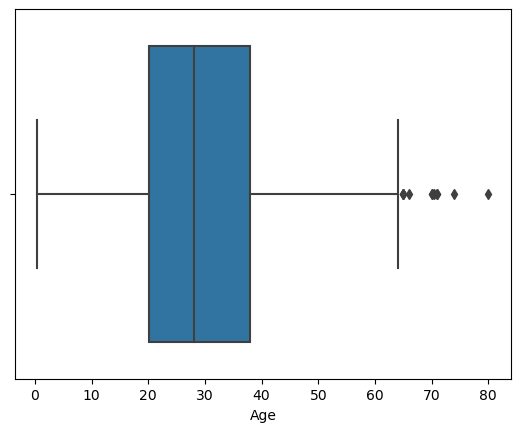

In [52]:
sns.boxplot(x = 'Age',data=df)

In [53]:
### STEP 1: Find Extreme Value
extreme = df.Age.mean() + 3*df.Age.std()

### STEP 2: Fill nan with extreme value
df['Age_end_distribution']  = df['Age'].fillna(extreme)

df
df[df['Age'].isna()][['Age','Age_end_distribution']]

,Age,Age_end_distribution
5,NaN,73.27861
17,NaN,73.27861
19,NaN,73.27861
26,NaN,73.27861
28,NaN,73.27861
...,...,...
859,NaN,73.27861
863,NaN,73.27861
868,NaN,73.27861
878,NaN,73.27861


we can also use a least value based on our data distribution.

In all above methods we are replacing missing values with some other value from the sample.
What if missing values are not at random?

What if you are required to showcase the importance of missing values?

In all above and similar cases we can use Arbitrary Value Imputation.

#### METHOD 6.1: Arbitrary Value Imputation (Numerical)
In this method we replace missing value with lowest or highest value of the distribution. (-infinity, +infinity)

In case of Age we can replace missing values either with 0 or 100.(least and highest)

- This method not only fill missing values but also captures the importance of it.

In [54]:
### Filling Values using 0
df['Age_0'] = df['Age'].fillna(0)

### Filling Values using 100
df['Age_100'] = df['Age'].fillna(100)

df[df.Age.isna()][['Age','Age_0','Age_100']]

,Age,Age_0,Age_100
5,NaN,0.0,100.0
17,NaN,0.0,100.0
19,NaN,0.0,100.0
26,NaN,0.0,100.0
28,NaN,0.0,100.0
...,...,...,...
859,NaN,0.0,100.0
863,NaN,0.0,100.0
868,NaN,0.0,100.0
878,NaN,0.0,100.0


#### METHOD 6.2: Arbitrary Value Imputation (Categorical)

In [55]:
df['Cabin_Missing'] = df['Cabin'].fillna('Missing')

In [56]:
df[df.Cabin.isna()][['Cabin','Cabin_Missing']]

,Cabin,Cabin_Missing
0,NaN,Missing
2,NaN,Missing
4,NaN,Missing
5,NaN,Missing
7,NaN,Missing
...,...,...
884,NaN,Missing
885,NaN,Missing
886,NaN,Missing
888,NaN,Missing


This method works fine but the only problem with this it it creates a new category Missing. If count of missing values is higher than other known categories than Missingcategory will impact the result more that will leads to an bad performing model.

To prevent this problem we can create a new feature containing information about missing values, where 1 will represent a missing value.

### METHOD 7: Capturing Missing Values with new feature.¶
It works well if the data are not missing completely at random.

In [57]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

In [58]:
### STEP 1: Creating a new feature
df['Cabin_nan']=np.where(df['Cabin'].isnull(),1,0)

In [59]:
df.iloc[:5][['Cabin','Cabin_nan']]

,Cabin,Cabin_nan
0,NaN,1
1,C85,0
2,NaN,1
3,C123,0
4,NaN,1


Once a new feature is added we can make use of any method to fill missing values.

In [60]:
df['Cabin'].mode()[0]

'B96 B98'

In [61]:
df['Cabin'].fillna(df['Cabin'].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

We can try same for numerical column Age as well.

In [62]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

In [63]:
df[['Age','Age_nan']]

,Age,Age_nan
0,22.0,0
1,38.0,0
2,26.0,0
3,35.0,0
4,35.0,0
...,...,...
886,27.0,0
887,19.0,0
888,NaN,1
889,26.0,0


All above methods we have discussed makes use of manual approach to find missing values and then fill using fillna. There are some advanced methods as well that makes use of machine learning models to predict missing values.

Let's see some of the most famous technique of predicting missing values using machine learning.

### METHOD 8: KNN Imputer
In this technique, we predict missing values using an algorithm that uses the values of nearby data points to impute, or predict, missing values. KNN stands for K-Nearest Neighbors, with K referring to the (user-defined) number of neighbors the algorithm will take into account.

KNN only works with numerical data. In some cases, however, non-numerical (e.g., categorical) data may be converted to numerical data for use with the KNN Imputer as well. We can also use the KNN Imputer with multiple features (or columns) at once.

In [64]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_mean,Age_median,Age_mode,Embarked_mode,Age_random_sample,Age_end_distribution,Age_0,Age_100,Cabin_Missing,Age_nan,Cabin_nan
0,0,3,male,22.0,1,0,7.2500,NaN,S,22.000000,22.0,22.0,S,22.0,22.00000,22.0,22.0,Missing,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,38.000000,38.0,38.0,C,38.0,38.00000,38.0,38.0,C85,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,26.000000,26.0,26.0,S,26.0,26.00000,26.0,26.0,Missing,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,35.000000,35.0,35.0,S,35.0,35.00000,35.0,35.0,C123,0,0
4,0,3,male,35.0,0,0,8.0500,NaN,S,35.000000,35.0,35.0,S,35.0,35.00000,35.0,35.0,Missing,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,27.000000,27.0,27.0,S,27.0,27.00000,27.0,27.0,Missing,0,1
887,1,1,female,19.0,0,0,30.0000,B42,S,19.000000,19.0,19.0,S,19.0,19.00000,19.0,19.0,B42,0,0
888,0,3,female,NaN,1,2,23.4500,NaN,S,29.699118,28.0,24.0,S,25.0,73.27861,0.0,100.0,Missing,1,1
889,1,1,male,26.0,0,0,30.0000,C148,C,26.000000,26.0,26.0,C,26.0,26.00000,26.0,26.0,C148,0,0


We will study about it and Linear regression when we learn these algorithm

### Method 9: Imputation using Linear Regression
### Method 10: Imputation Using Multivariate Imputation by Chained Equation (MICE)

#### Let's Compare Each Method Imputations..........

In [65]:
df[df.Age.isna()][['Age','Age_mean','Age_median', 'Age_mode', 'Age_random_sample','Age_end_distribution', 'Age_0', 'Age_100']]

,Age,Age_mean,Age_median,Age_mode,Age_random_sample,Age_end_distribution,Age_0,Age_100
5,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
17,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
19,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
26,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
28,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
...,...,...,...,...,...,...,...,...
859,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
863,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
868,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0
878,NaN,29.699118,28.0,24.0,25.0,73.27861,0.0,100.0


Now, as we see all Methods of imputation, we will now handle missing values with best imputation

In [66]:
df.isnull().sum()

Survived                  0
Pclass                    0
Sex                       0
Age                     177
SibSp                     0
Parch                     0
Fare                      0
Cabin                   687
Embarked                  2
Age_mean                  0
Age_median                0
Age_mode                  0
Embarked_mode             0
Age_random_sample         0
Age_end_distribution      0
Age_0                     0
Age_100                   0
Cabin_Missing             0
Age_nan                   0
Cabin_nan                 0
dtype: int64

In [67]:
df.drop(["Age","Cabin","Embarked",'Age_median', 'Age_mode', 'Age_random_sample','Age_end_distribution', 'Age_0', 'Age_100',"Age_nan","Cabin_Missing"],axis=1,inplace=True)

In [68]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_mean,Embarked_mode,Cabin_nan
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


In [70]:
df.rename(columns={'Age_mean': 'Age', 'Embarked_mode': 'Embarked', 'Cabin_nan': 'Cabin'}, inplace=True)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


## 6.2) Removing Outliers
An Outlier is a data item/object that deviates significantly from the rest of the (so-called normal) objects. Identifying outliers is important in statistics and data analysis because they can have a significant impact on the results of statistical analyses.
Outliers can skew the mean (average) and affect measures of central tendency, as well as influence the results of tests of statistical significance.

### i) Detecting and removing outlier using boxplot

A boxplot, also known as a box-and-whisker plot, provides a visual summary of the distribution of a dataset. It displays several descriptive statistics such as the median, quartiles, and potential outliers.

Here's what a boxplot typically tells us:
1. Median (Q2/50th Percentile): The middle value of the dataset. It represents the point where half of the data is below and half is above.
2. Quartiles (Q1, Q3): The dataset is divided into four equal parts. Q1 (lower quartile) is the value below which 25% of the data falls, and Q3 (upper quartile) is the value below which 75% of the data falls.
3. Interquartile Range (IQR): The range between the first and third quartiles (Q3 - Q1). It describes the middle 50% of the data.
4. Whiskers: Lines extending from the box that represent the range of the data, excluding outliers. The whiskers typically extend to 1.5 times the IQR from the quartiles.
5. Outliers: Data points that fall outside the whiskers. These points are typically plotted individually.
6. Box length: The length of the box represents the spread of the middle 50% of the data. A longer box indicates a larger spread.

By observing a boxplot, you can quickly grasp key aspects of the distribution of your data, such as its central tendency, spread, and presence of outliers. It's particularly useful for comparing distributions between different groups or datasets.

Survived


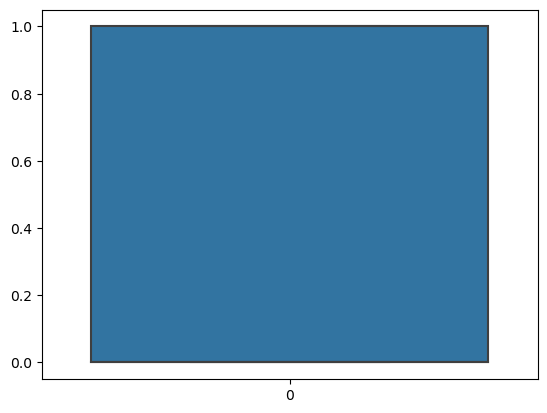

Pclass


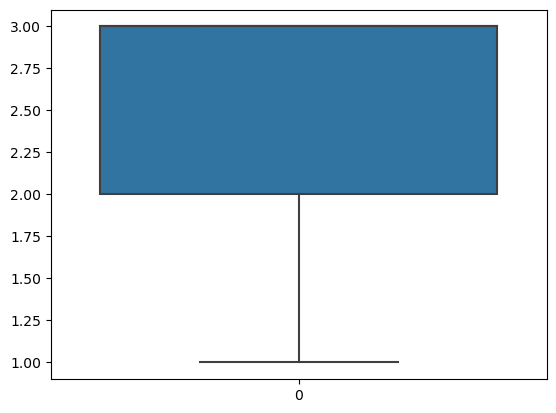

Age


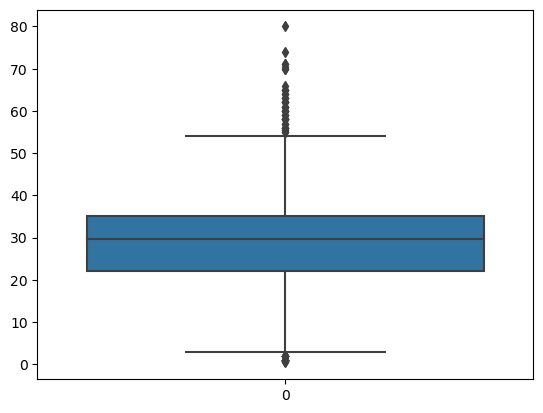

SibSp


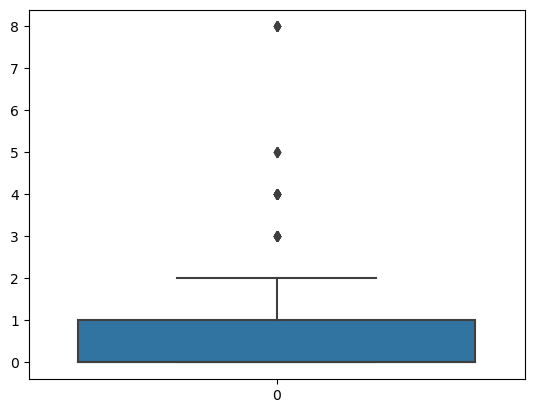

Parch


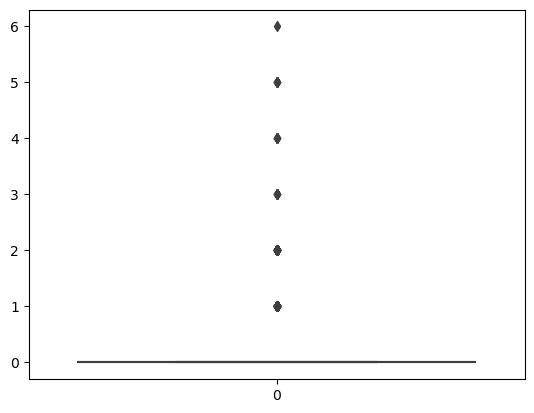

Fare


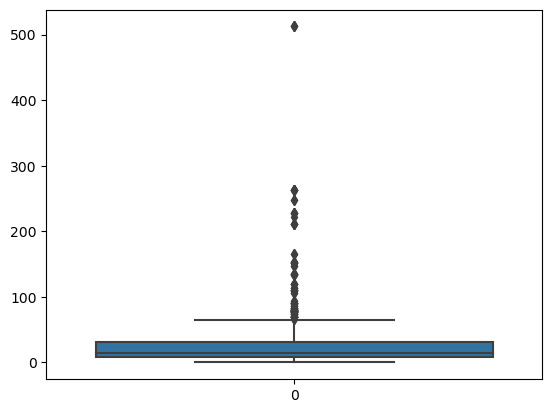

In [71]:
for col in num_cols:
    print(col)
    sns.boxplot(df[col])
    plt.show()

In [72]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

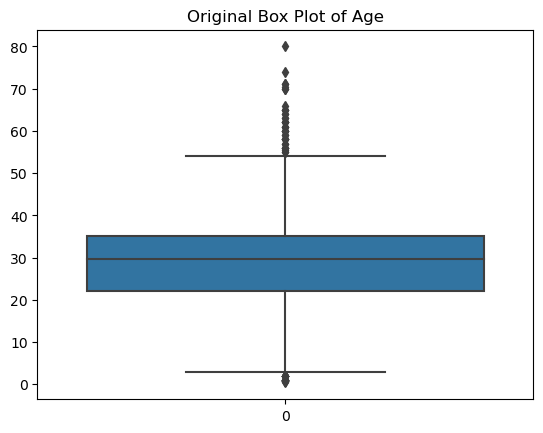

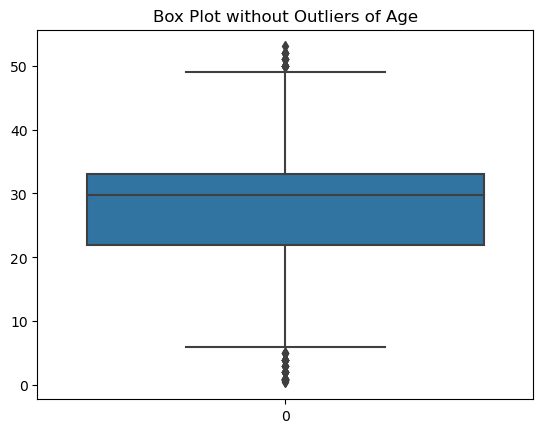

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


In [77]:
df1=removal_box_plot(df, 'Age', 53)
df1

The decision to remove outliers depends on various factors, including the objectives of the analysis, the nature of the data, and the impact of outliers on statistical measures and model assumptions. It's essential to carefully assess each case and consider domain knowledge before deciding whether to remove outliers or not

Like in this case, there are looking so many outliers present in dataset but actually they are not the outliers, it's a real data just signifies that most people are from age 20-40. So, in these cases we don't have to remove outliers as they are mathematically outliers but not actually outliers.

In [78]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


### ii) Using Scatterplot
It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables

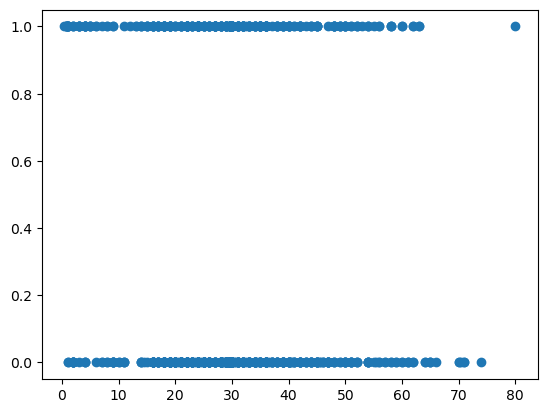

In [79]:
plt.scatter(df["Age"],df["Survived"])
plt.show()

As we can clearly see this method is not that effective

### iii) Using Z-Score
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

Zscore = (data_point -mean) / std. deviation

In [80]:
from scipy import stats

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Age       891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Cabin     891 non-null    int32  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


#### Note: It doesn't work in columns that has missing values

In [82]:
df2 = df.dropna(subset=['Age'])
df2

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


In [83]:
df2.describe()

,Survived,Pclass,SibSp,Parch,Fare,Age,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,29.699118,0.771044
std,0.486592,0.836071,1.102743,0.806057,49.693429,13.002015,0.420397
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,22.000000,1.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,29.699118,1.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,35.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,80.000000,1.000000


In [84]:
z = np.abs(stats.zscore(df2['Age']))
print(z)

0      0.592481
1      0.638789
2      0.284663
3      0.407926
4      0.407926
         ...   
886    0.207709
887    0.823344
888    0.000000
889    0.284663
890    0.177063
Name: Age, Length: 891, dtype: float64


In [85]:
threshold_z = 2.5
 
outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (891, 9)
DataFrame Shape after Removing Outliers: (876, 9)


We can set any threshold and can remove those outliers that are far from z-score far than defined threshold

### iv) Inter Quartile Range
IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

IQR = Quartile3 – Quartile1

In [86]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked,Cabin
0,0,3,male,1,0,7.2500,22.000000,S,1
1,1,1,female,1,0,71.2833,38.000000,C,0
2,1,3,female,0,0,7.9250,26.000000,S,1
3,1,1,female,1,0,53.1000,35.000000,S,0
4,0,3,male,0,0,8.0500,35.000000,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.000000,S,1
887,1,1,female,0,0,30.0000,19.000000,S,0
888,0,3,female,1,2,23.4500,29.699118,S,1
889,1,1,male,0,0,30.0000,26.000000,C,0


In [87]:
# IQR
Q1 = np.percentile(df2['Age'], 25, method='midpoint')
print("Q1 is:",Q1)
Q3 = np.percentile(df2['Age'], 75, method='midpoint')
print("Q3 is:",Q3)
IQR = Q3 - Q1
print("IQR is:",IQR)

Q1 is: 22.0
Q3 is: 35.0
IQR is: 13.0


Here, Q1 is 25 Percentile and Q3 is 75 percentile

So, IQR tells us about the range where 50% of the data lies

To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

In [88]:
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

We define upper and lower as 1.5 times above Q3 and 1.5 times lower than Q1, these are called whiskers

Now, Data points outside these whiskers are considered as outliers

In [89]:
# Above Upper bound
upper_array = np.array(df2['Age'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())
 
# Below Lower bound
lower_array = np.array(df2['Age'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())

Upper Bound: 54.5
42
Lower Bound: 2.5
24


It tells the count of data points that are outliers

In [90]:
print("Old Shape: ", df2.shape)
# Removing the outliers
# Remove outliers and assign the modified DataFrame to df3
df3 = df2[~(upper_array | lower_array)]

# Print the new shape of the DataFrame
print("New Shape:", df3.shape)

Old Shape:  (891, 9)
New Shape: (825, 9)


We removed the data points that are outside the upper array and lower array

#### IQR method is the best method to remove outliers

#### Conclusion:
In conclusion, Visualization tools like box plots and scatter plots aid in identifying outliers, and mathematical methods such as Z-scores and Inter Quartile Range (IQR) offer robust approaches.